In [84]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from scipy import stats
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics

In [85]:
nbaData = pd.read_csv("all_seasons.csv")
nbaData.head()

,Index,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [86]:
points = pd.DataFrame(nbaData['pts'])
height = pd.DataFrame(nbaData['player_height'])
usageRate = pd.DataFrame(nbaData['usg_pct'])

In [87]:
points.describe()

,pts
count,11700.000000
mean,8.169299
std,5.956115
min,0.000000
25%,3.600000
50%,6.700000
75%,11.500000
max,36.100000


# The average number of points an NBA Player scores per game is about 8 points.

<AxesSubplot:ylabel='Density'>

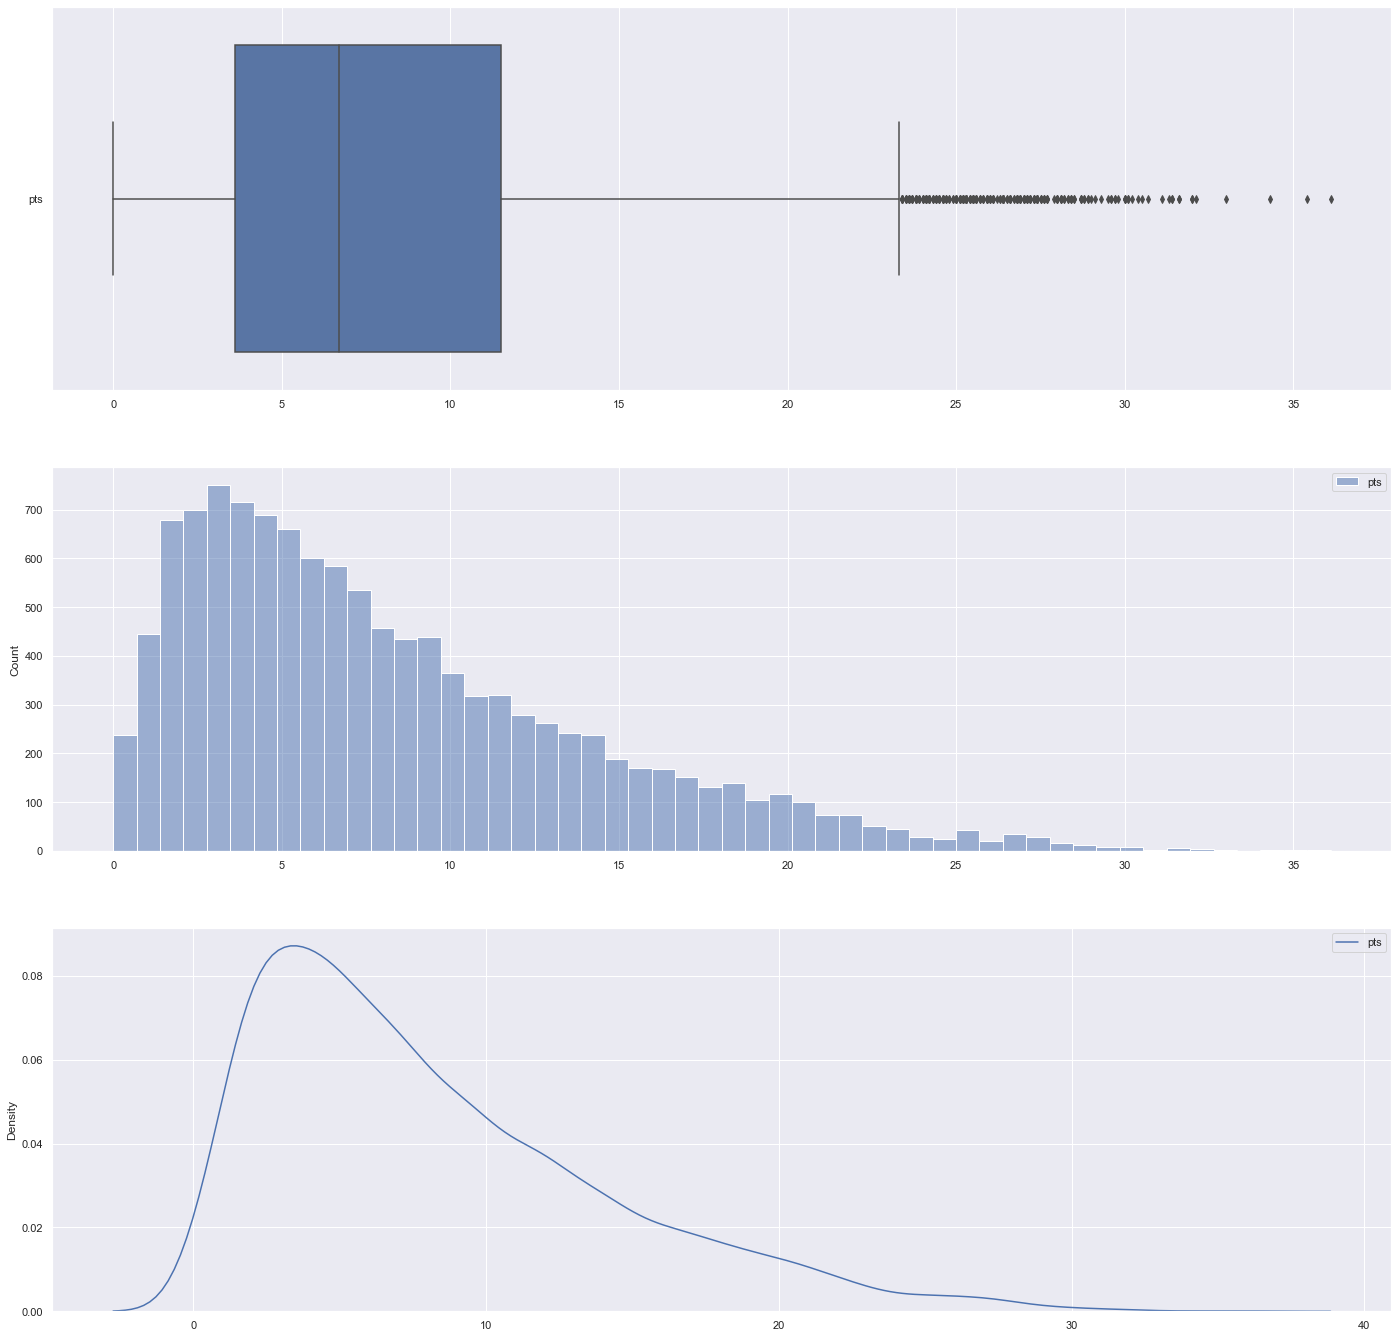

In [88]:
f, axes = plt.subplots(3, figsize=(24, 24))
sb.boxplot(data=points, orient='h', ax = axes[0])
sb.histplot(data=points, ax = axes[1])
sb.kdeplot(data=points, ax = axes[2])

In [89]:
height.describe()

,player_height
count,11700.000000
mean,200.728501
std,9.169827
min,160.020000
25%,193.040000
50%,200.660000
75%,208.280000
max,231.140000


# The average height of an NBA player is 200.7cm.

<AxesSubplot:ylabel='Density'>

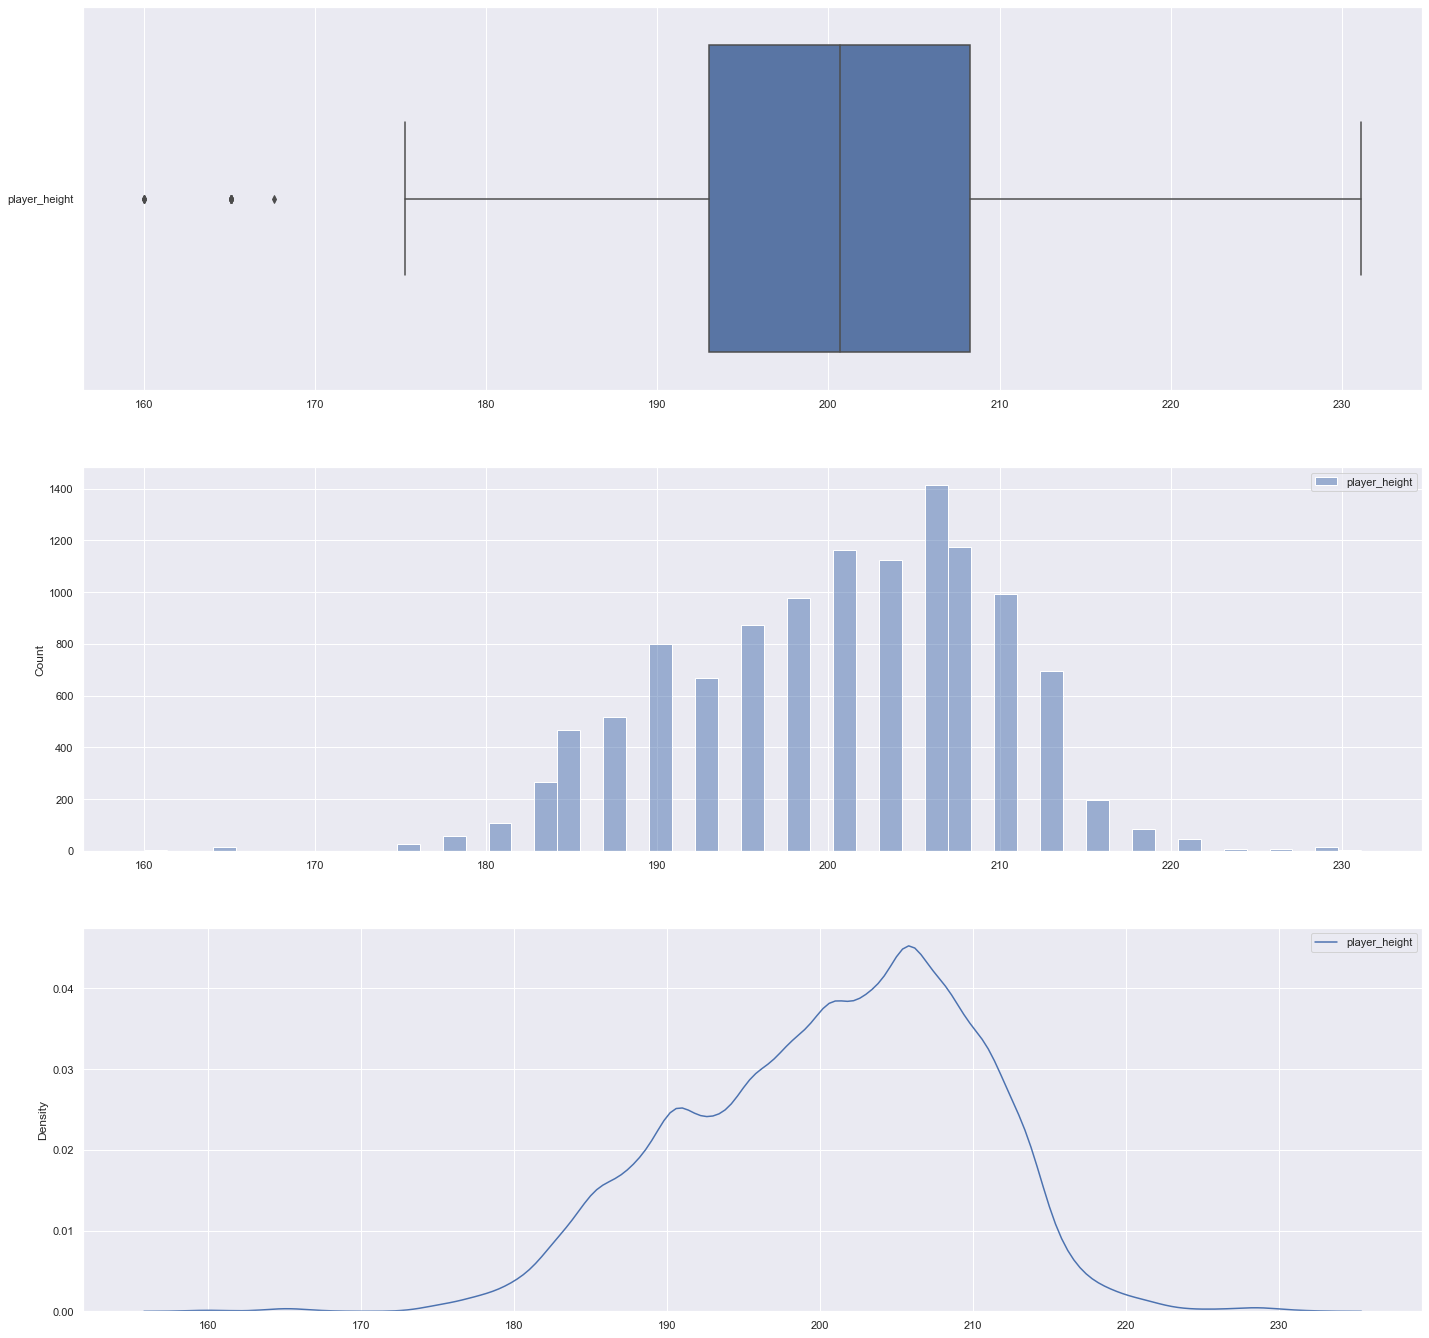

In [90]:
f, axes = plt.subplots(3, figsize=(24, 24))
sb.boxplot(data=height, orient='h', ax = axes[0])
sb.histplot(data=height, ax = axes[1])
sb.kdeplot(data=height, ax = axes[2])

In [91]:
usageRate.describe()

,usg_pct
count,11700.000000
mean,0.185380
std,0.052957
min,0.000000
25%,0.150000
50%,0.182000
75%,0.218000
max,1.000000


## The average nba player is used in around 18.5% of plays while he was on the floor

<AxesSubplot:ylabel='Density'>

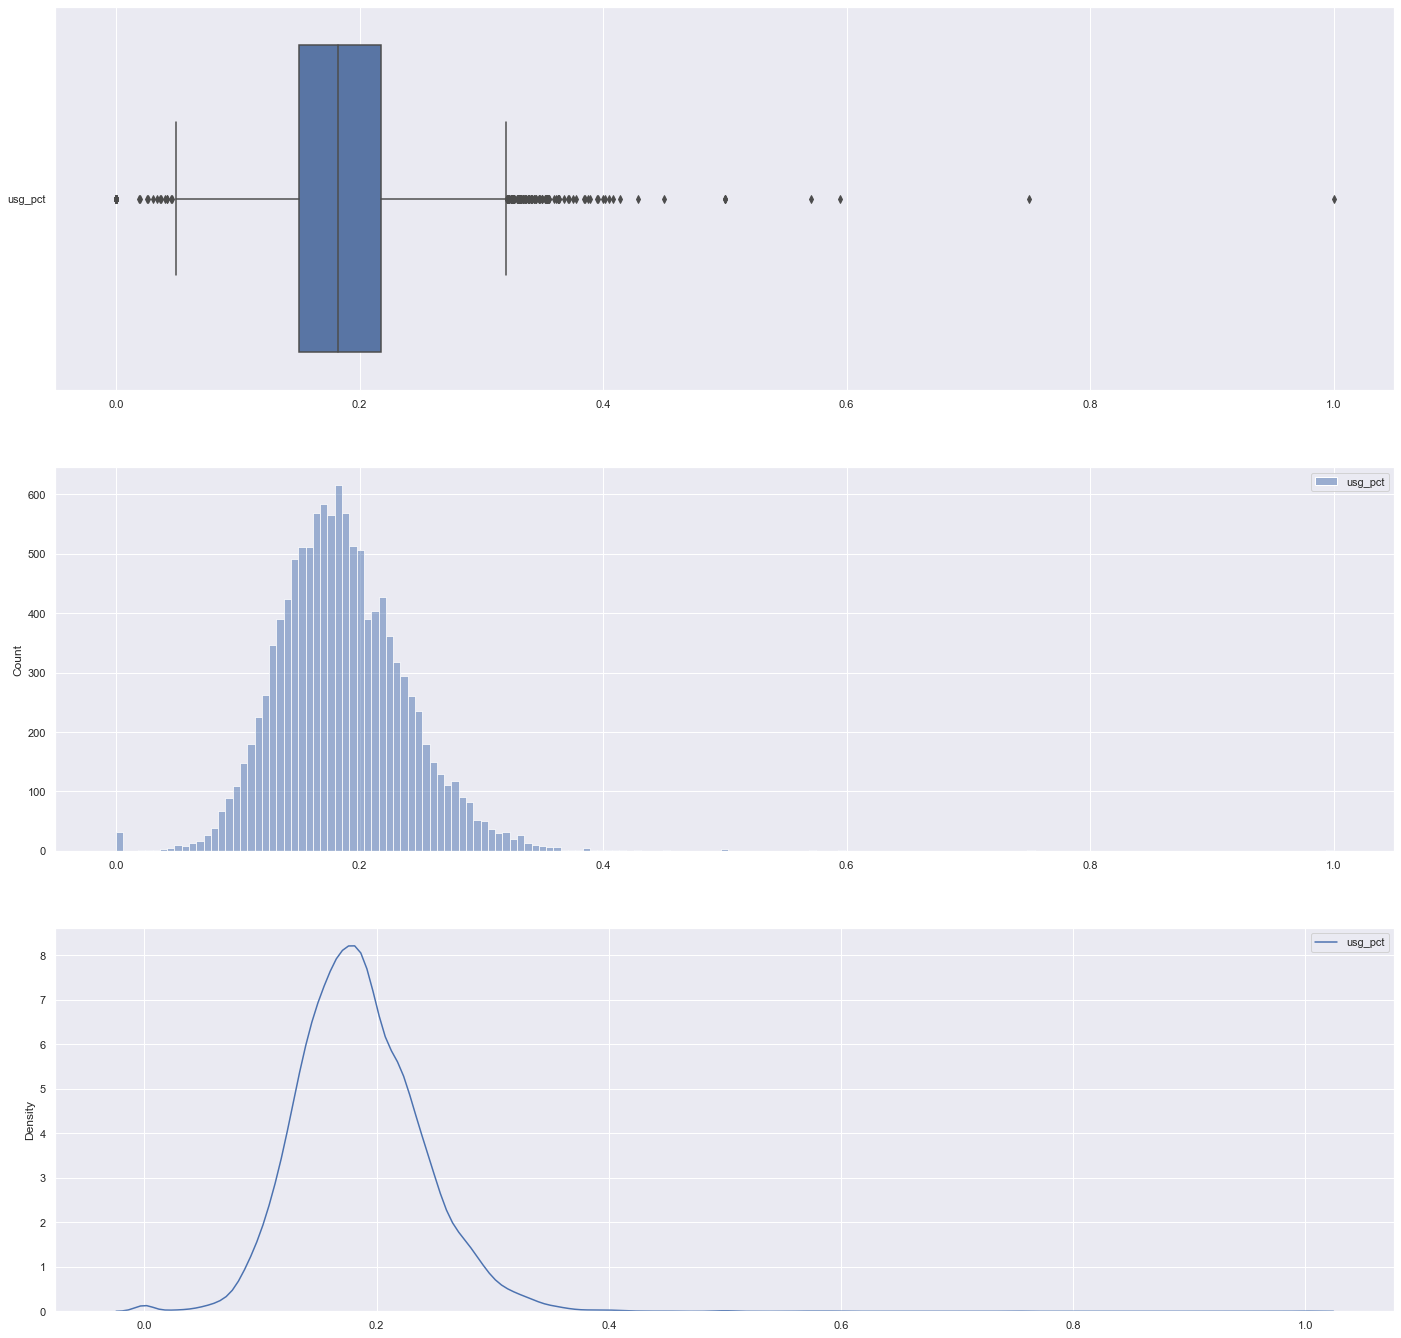

In [92]:
f, axes = plt.subplots(3, figsize=(24, 24))
sb.boxplot(data=usageRate, orient='h', ax = axes[0])
sb.histplot(data=usageRate, ax = axes[1])
sb.kdeplot(data=usageRate, ax = axes[2])

In [93]:
jointHeightPts = pd.concat([height, points], axis = 1)
jointUsageRatePts = pd.concat([usageRate, points], axis = 1)

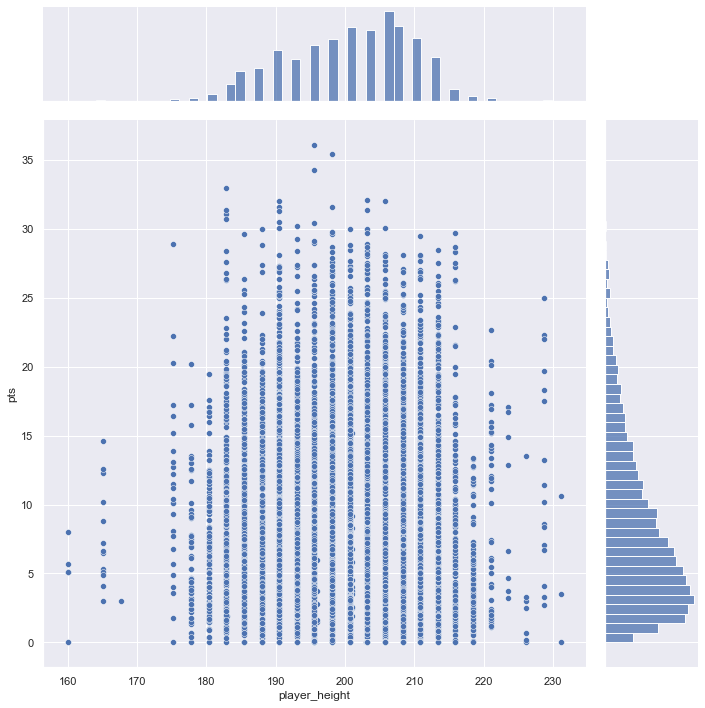

In [94]:
sb.jointplot(data = jointHeightPts, x = "player_height", y = "pts", height = 10)

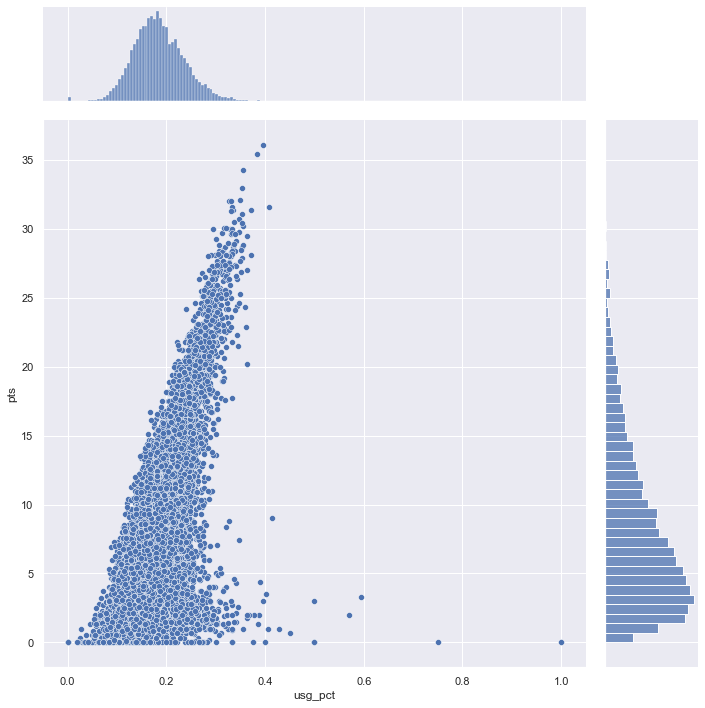

In [95]:
sb.jointplot(data = jointUsageRatePts, x = "usg_pct", y = "pts", height = 10)

In [96]:
jointHeightPts.corr()

,player_height,pts
player_height,1.000000,-0.060524
pts,-0.060524,1.000000


In [97]:
jointUsageRatePts.corr()

,usg_pct,pts
usg_pct,1.000000,0.638037
pts,0.638037,1.000000


## There is a strong positive correlation between the NBA player's usage rate and the number of points they score.
## Whereas there is a very weak negative correlation between the NBA player's height and the number of points they score. 
## Hence, we can conclude that height does not play a significant role in the number of points an NBA player can score and that the usage rate of a player plays a more significant role in the number of points a player scores.

# Linear Regression Model for points and height

In [98]:
points_train, points_test, height_train, height_test = train_test_split(points, height, test_size=0.2)
print("Train Set :", points_train.shape, height_train.shape)
print("Test Set  :", points_test.shape, height_test.shape)

Train Set : (9360, 1) (9360, 1)
Test Set  : (2340, 1) (2340, 1)


In [99]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [100]:
linreg.fit(height_train, points_train)

LinearRegression()

In [101]:
print('Intercept \t: a = ', linreg.coef_)
print('Coefficients \t: b = ', linreg.intercept_)

Intercept 	: a =  [[-0.03664547]]
Coefficients 	: b =  [15.51200852]


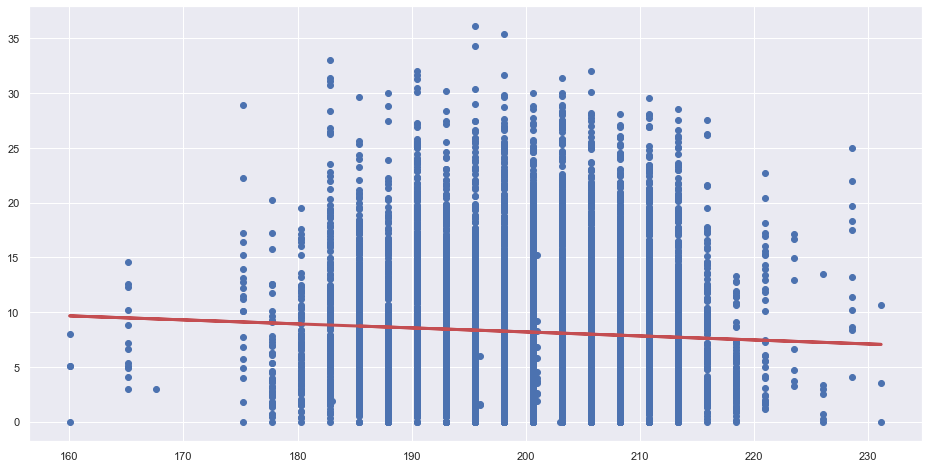

In [102]:
regline_x = height_train
regline_y = linreg.intercept_ + linreg.coef_ * height_train

f = plt.figure(figsize=(16, 8))
plt.scatter(height_train, points_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [103]:
points_test_pred = linreg.predict(height_test)
print("Explained Variance for the train dataset (R^2):", linreg.score(height_train, points_train))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mseTest = mean_sq_err(points_test, points_test_pred)
print("Root Mean Squared Error for test dataset (RMSE):", np.sqrt(mseTest))

Explained Variance for the train dataset (R^2): 0.0031908136572732504
Root Mean Squared Error for test dataset (RMSE): 5.917507025638564


# Linear regression model for points and usage rate

In [109]:
points_train1, points_test1, usageRate_train, usageRate_test = train_test_split(points, usageRate, test_size=0.2)
print("Train Set :", points_train1.shape, usageRate_train.shape)
print("Test Set  :", points_test1.shape, usageRate_test.shape)

Train Set : (9360, 1) (9360, 1)
Test Set  : (2340, 1) (2340, 1)


In [110]:
linreg = LinearRegression()

In [111]:
linreg.fit(usageRate_train, points_train1)

LinearRegression()

In [112]:
print('Intercept \t: a = ', linreg.coef_)
print('Coefficients \t: b = ', linreg.intercept_)

Intercept 	: a =  [[71.63460622]]
Coefficients 	: b =  [-5.11287562]


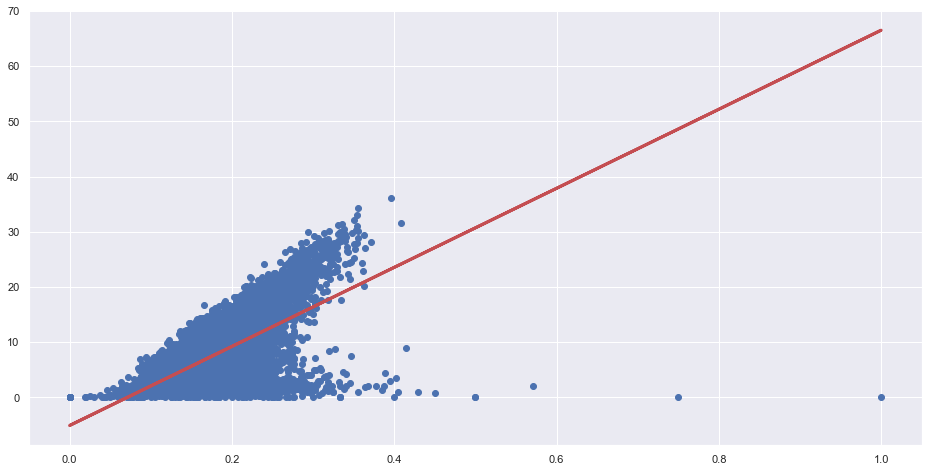

In [113]:
regline_x = usageRate_train
regline_y = linreg.intercept_ + linreg.coef_ * usageRate_train

f = plt.figure(figsize=(16, 8))
plt.scatter(usageRate_train, points_train1)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [114]:
points_test_pred1 = linreg.predict(usageRate_test)
print("Explained Variance for the train dataset (R^2):", linreg.score(usageRate_train, points_train1))

def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mseTest = mean_sq_err(points_test1, points_test_pred1)
print("Root Mean Squared Error for test dataset (RMSE):", np.sqrt(mseTest))

Explained Variance for the train dataset (R^2): 0.40266707945825375
Root Mean Squared Error for test dataset (RMSE): 4.508901777236394


## The explained variance for the linear regression model on usage rate is a lot higher than that of the model on height. The RMSE is also lower on the model on usage rate than compared to the model on height. Hence, usage rate is a better predictor of number of points scored than that of height. 